# INSTALL AND IMPORT DEPENDENCIES

In [2]:
!pip3 install torch torchvision torchaudio

     -------------------------------------- 162.3/162.3 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 969.8/969.8 kB 4.4 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

  Using cached PyYAML-6.0-cp310-cp310-win_amd64.whl (151 kB)
  Using cached scipy-1.8.1-cp310-cp310-win_amd64.whl (36.9 MB)
  Using cached torch-1.11.0-cp310-cp310-win_amd64.whl (158.0 MB)
  Using cached torchvision-0.12.0-cp310-cp310-win_amd64.whl (1.0 MB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached pandas-1.4.3-cp310-cp310-win_amd64.whl (10.5 MB)
     -------------------------------------- 292.8/292.8 kB 3.0 MB/s eta 0:00:00
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0
    Uninstalling torchvision-0.13.0:
      Successfully uninstalled torchvision-0.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.12.0 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# LOAD MODEL

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\amre/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-7-7 Python-3.10.4 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# MAKE DETECTIONS WITH IMAGES

In [22]:
img = 'https://th.bing.com/th/id/R.2f52a356c87d4d40374404cd30140c35?rik=CYZ0xVw1sOqSgQ&riu=http%3a%2f%2fi.huffpost.com%2fgen%2f1324194%2fimages%2fo-DRIVERS-TRAFFIC-facebook.jpg&ehk=AT7XxdZq5EDQ%2fMl%2bQzQuogHdXmQXglRKGUiBVhx4FlU%3d&risl=&pid=ImgRaw&r=0'

In [23]:
results = model(img)
results.print()

image 1/1: 1017x1536 25 cars, 1 traffic light
Speed: 206.0ms pre-process, 227.0ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


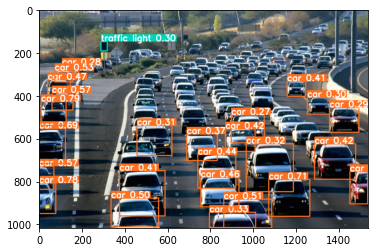

In [24]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.xyxy

[tensor([[7.43290e+02, 4.83435e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13580e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

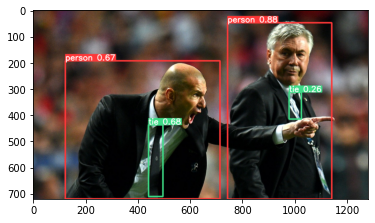

In [15]:
plt.imshow(np.squeeze(results.render()))

# REAL TIME DETECTIONS

In [29]:
cap = cv2.VideoCapture(0xFF)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# TRAIN FROM SCRATCH

In [3]:
import uuid # unique identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [5]:
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Writes out image to file
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()))

        # Render to the screen
        cv2.imwrite(imgname, frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        

collecting images for awake, image number 0


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:730: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [1]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [2]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 5.5 MB/s eta 0:00:00


In [7]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 24 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to 'C:\Python\Computer': No such file or directory
YOLOv5  2022-7-7 Python-3.10.4 torch-1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

# LOAD CUSTOM MODEL

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp3/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\amre/.cache\torch\hub\master.zip
YOLOv5  2022-7-28 Python-3.10.4 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'sleep_WIN_20220715_15_54_28_Pro.jpg')

In [19]:
results = model(img)

In [14]:
results.print()

image 1/1: 720x1280 1 drowsy
Speed: 27.8ms pre-process, 214.5ms inference, 12.0ms NMS per image at shape (1, 3, 384, 640)


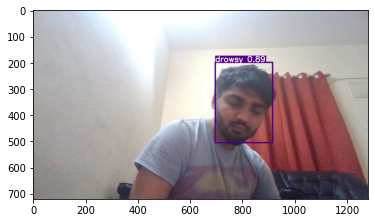

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()